<a href="https://colab.research.google.com/github/ansonsibi1/Book_Recommendation_System_Anson_Sibi/blob/main/Book_Recommendation_System_Anson_Sibi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BOOK RECOMMENDATION SYSTEM**

#**Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
<br>
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).<br>
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

In [ ]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')


#**The Data**

The Book-Crossing dataset comprises 3 files.<br>
● Users :<br>
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.<br>
● Books : <br>
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.<br>
● Ratings :<br> 
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [ ]:
#Books data
books=pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Book recommendation system - Capstone project 4/Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
#Loading data
users=pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Book recommendation system - Capstone project 4/Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
#Ratings Data
ratings=pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Book recommendation system - Capstone project 4/Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


#EDA

##Books

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
L=((books.isnull().sum()).sort_values()).to_dict()
for i in L:
    print(i,"--->",L[i]) 

ISBN ---> 0
Book-Title ---> 0
Year-Of-Publication ---> 0
Image-URL-S ---> 0
Image-URL-M ---> 0
Book-Author ---> 1
Publisher ---> 2
Image-URL-L ---> 3


In [ ]:
print("unique isbn: ",len(books["ISBN"].unique()))
print("total rows: ",books.shape[0])
print("unique title: ",len(books["Book-Title"].unique()))
print("total rows: ",books.shape[0])

unique isbn:  271360
total rows:  271360
unique title:  242135
total rows:  271360


we can see that some titles are repeated

In [ ]:
books['Book-Author'].fillna("Unknown",inplace=True)
books['Publisher'].fillna("Unknown",inplace=True)
books.dropna(axis=0,inplace=True)
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

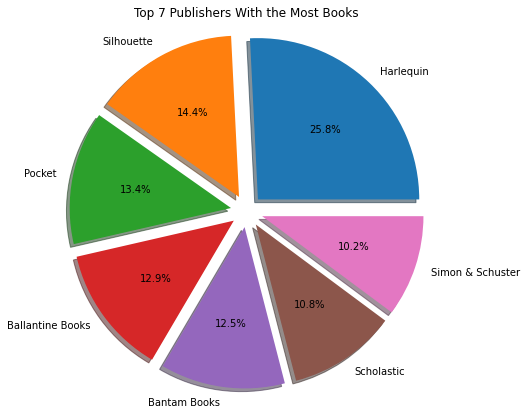

In [ ]:
my_dict=(books['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon & Schuster'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )
fig1 , ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Publishers With the Most Books")
ax1.axis ('equal')
plt.show()

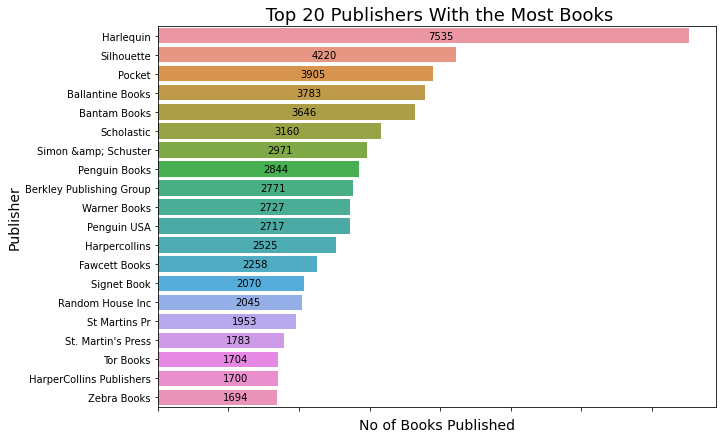

In [ ]:
b = count.sort_values(by=['count'], ascending = False)
b = b.head(20)
x =['Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon &amp; Schuster']
y = [7537,4220,3905,3783,3646,3160,2971]
fig=plt.figure(figsize=(10,7))
ax = sns.barplot(x = 'count',y = 'c' , data = b)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
plt.xlabel("No of Books Published", size=14)
plt.ylabel("Publisher", size=14)
plt.title(" Top 20 Publishers With the Most Books", size=18)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width()/2, p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show()

In [ ]:
np.set_printoptions(threshold=np.inf)
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

we can see that the years are object type and we have zeros as well as there is some error by including names in years



In [ ]:
index=books.loc[books['Year-Of-Publication']=='DK Publishing Inc'].index
books.drop(index,inplace=True)
index=books.loc[books['Year-Of-Publication']=='Gallimard'].index
books.drop(index,inplace=True)
books['Year-Of-Publication'].replace({'0':books['Year-Of-Publication'].value_counts().idxmax()},inplace=True)
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(str).astype(int)
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

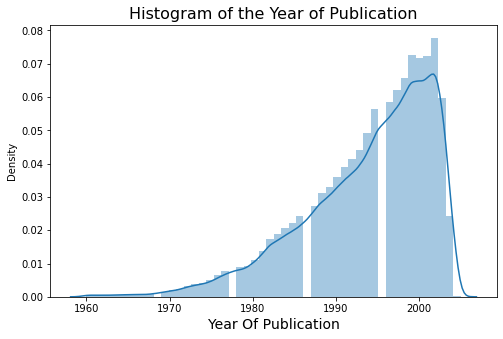

In [ ]:
fig=plt.figure(figsize=(8,5))
y1 = books[books['Year-Of-Publication'] >= 1960]
y1 = y1[y1['Year-Of-Publication'] <= 2005]
sns.distplot(y1['Year-Of-Publication'])
plt.xlabel('Year Of Publication',size=14)
plt.title('Histogram of the Year of Publication',size=16)
plt.show()

##Users

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
def missing_values(df):
  columns=users.columns
  missing=[]
  percentage=[]
  for i in columns:
    x=users[i].isnull().sum()
    missing.append(x)
    percentage.append((x/len(users))*100)
  data={'Features':columns,'Missing':missing ,'Percentage of total values':percentage}
  return pd.DataFrame(data).reset_index(drop=True) 


In [ ]:
missing_values(users)

,Features,Missing,Percentage of total values
0,User-ID,0,0.000000
1,Location,0,0.000000
2,Age,110762,39.719857


Text(0.5, 1.0, 'Find outlier data in Age column')

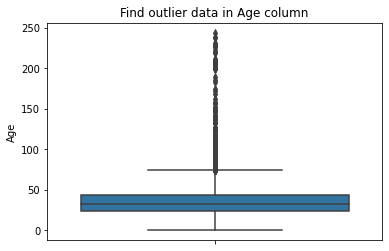

In [ ]:
sns.boxplot(y='Age', data=users)
plt.title('Find outlier data in Age column')

In [ ]:
users['Age'].fillna(users['Age'].value_counts().idxmax(),inplace=True)
for i in users['Age'][users['Age']>95]:
        users['Age'].replace({i:users['Age'].value_counts().idxmax()},inplace=True)
for i in users['Age'][users['Age']==0]:
        users['Age'].replace({i:users['Age'].value_counts().idxmax()},inplace=True)
users['Age'] = users['Age'].astype(int) 
users['Age'].unique()

array([24, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 20, 34, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67,  1, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75,  3,
       76, 83, 68, 11, 77,  2, 70, 93,  8,  7,  4, 81, 10,  5,  6, 84, 82,
       90, 91, 94, 85, 86, 92, 87, 95, 89, 88])

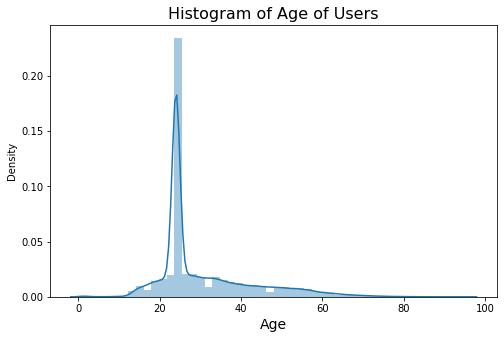

In [ ]:
fig=plt.figure(figsize=(8,5))
sns.distplot(users['Age'])
plt.xlabel('Age',size=14)
plt.title('Histogram of Age of Users',size=16)
plt.show()

In [ ]:
users['Location']

0                         nyc, new york, usa
1                  stockton, california, usa
2            moscow, yukon territory, russia
3                  porto, v.n.gaia, portugal
4         farnborough, hants, united kingdom
                         ...                
278853                 portland, oregon, usa
278854    tacoma, washington, united kingdom
278855             brampton, ontario, canada
278856             knoxville, tennessee, usa
278857                  dublin, n/a, ireland
Name: Location, Length: 278858, dtype: object

In [ ]:
users[['city','state','country','nan','nan','nan','nan','nan','nan']]=users['Location'].apply(lambda x: pd.Series(str(x).split(",")))
users.drop(['Location','nan'],axis=1,inplace=True)
users

,User-ID,Age,city,state,country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom
...,...,...,...,...,...
278853,278854,NaN,portland,oregon,usa
278854,278855,50.0,tacoma,washington,united kingdom
278855,278856,NaN,brampton,ontario,canada
278856,278857,NaN,knoxville,tennessee,usa


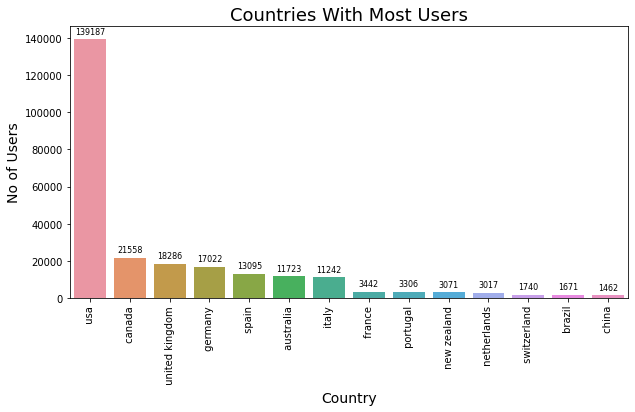

In [ ]:
my_dict=(users['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
f.drop(7,inplace=True)
fig=plt.figure(figsize=(10,5))
ax = sns.barplot(y = 'count',x= 'c' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 
plt.xlabel("Country", size=14)
plt.ylabel("No of Users", size=14)
plt.title("Countries With Most Users", size=18)
plt.show()

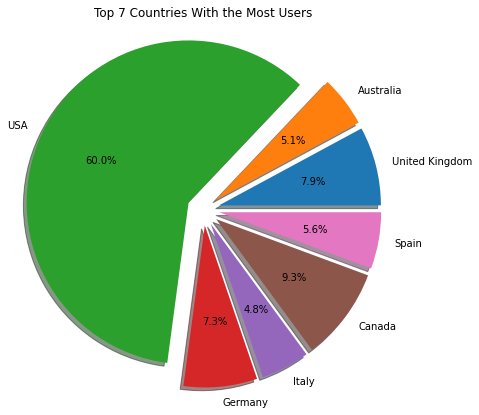

In [ ]:
# Pie chart showing countries with most number of users 
my_dict=(users['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'United Kingdom','Australia','USA','Germany','Italy','Canada','Spain'
sizes = [count['count'].iloc[2],count['count'].iloc[5],count['count'].iloc[0],count['count'].iloc[3],count['count'].iloc[6],
         count['count'].iloc[1],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )

fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Countries With the Most Users")
ax1.axis ('equal')

plt.show()

##Rating

In [ ]:
print(ratings.shape)
ratings.columns=['User-ID','ISBN','Book-Rating']
ratings.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings['Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [ ]:
filter1 = ratings[ratings["User-ID"].isin(users["User-ID"])] 
df_ratings=filter1[filter1["ISBN"].isin(books["ISBN"])] 
df=pd.merge(users,df_ratings,on='User-ID')
df

,User-ID,Age,city,state,country,ISBN,Book-Rating
0,2,18.0,stockton,california,usa,0195153448,0
1,8,NaN,timmins,ontario,canada,0002005018,5
2,8,NaN,timmins,ontario,canada,0060973129,0
3,8,NaN,timmins,ontario,canada,0374157065,0
4,8,NaN,timmins,ontario,canada,0393045218,0
...,...,...,...,...,...,...,...
1031131,278854,NaN,portland,oregon,usa,0425163393,7
1031132,278854,NaN,portland,oregon,usa,0515087122,0
1031133,278854,NaN,portland,oregon,usa,0553275739,6
1031134,278854,NaN,portland,oregon,usa,0553578596,0


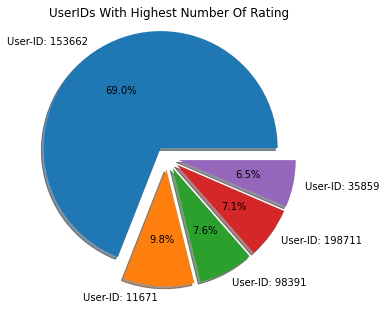

In [ ]:
# Pie chart showing countries with most number of users 
my_dict=(df_ratings['Book-Rating'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'User-ID: 153662','User-ID: 11671','User-ID: 98391','User-ID: 198711','User-ID: 35859'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1)

fig1 , ax1 = plt.subplots(figsize=(5,5))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("UserIDs With Highest Number Of Rating")
ax1.axis ('equal')

plt.show()

#Popularity Based

<font color='blue'>As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.<br>
Book weighted avg formula:<br>
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>
where,<br>
v is the number of votes for the books;<br>
m is the minimum votes required to be listed in the chart;<br>
R is the average rating of the book; and<br>
C is the mean vote across the whole report.<br>
Now we find the values of v,m,R,C.

In [ ]:
# Create column Rating average 
final_df['Avg_Rating']=final_df.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
final_df['Total_No_Of_Users_Rated']=final_df.groupby('ISBN')['Book-Rating'].transform('count')

In [ ]:
C= final_df['Avg_Rating'].mean()
m= final_df['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = final_df.loc[final_df['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.736148921808029 , m=42.0


(27113, 11)

<font color='blue'>Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.<br>
We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:


In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [ ]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),105,9.419048,8.938219
1,"The Return of the King (The Lord of the Rings, Part 3)",64,9.562500,8.838851
2,Harry Potter and the Order of the Phoenix (Book 5),179,9.078212,8.823160
3,Harry Potter and the Prisoner of Azkaban (Book 3),111,9.207207,8.803387
4,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),224,8.977679,8.781648
5,To Kill a Mockingbird,155,9.006452,8.735626
6,Harry Potter and the Sorcerer's Stone (Book 1),97,9.144330,8.718836
7,Harry Potter and the Prisoner of Azkaban (Book 3),105,9.095238,8.706927
8,"The Two Towers (The Lord of the Rings, Part 2)",68,9.220588,8.653802
9,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",95,9.042105,8.641739


#Memory Based

##Item -Based Collaborative filtering

In [ ]:
# We can calculate the ratings of the books and eliminate the rare books by determining a threshold which is 5 in this case by removing the main dataframe.
# Finally, we have common books which are rated more than 8.
rating_book = pd.DataFrame(final_df['Book-Title'].value_counts())
final_df['Book-Title'].value_counts().mean() # 

rare_books = rating_book[rating_book['Book-Title'] <=5].index

common_books = final_df[~final_df["Book-Title"].isin(rare_books)]
common_books['Book-Title'].value_counts().mean() 

16.147133502605907

In [ ]:
# Creating User-Item Matrix Dataframe
user_book_matrix = common_books.pivot_table(index=['User-ID'], columns=['Book-Title'], values='Book-Rating').fillna(0)
user_book_matrix.shape

(26994, 7483)

In [ ]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(user_book_matrix.values)


In [ ]:

df=user_book_matrix.T

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute',n_neighbors=6)
knn.fit(df.values)
distances, indices = knn.kneighbors(df.values)

In [ ]:
for i in indices[188]:
  print(df.index[indices[i]].values)

['A River Runs Through It, and Other Stories'
 'The Celestine Prophecy : AN EXPERIENTIAL GUIDE' 'Crossing to Safety'
 'Gods and Generals' 'The Piano Teacher'
 'Ill Wind (Anna Pigeon Mysteries (Paperback))']
['The Celestine Prophecy : AN EXPERIENTIAL GUIDE'
 'The Tenth Insight : Holding the Vision' 'The Piano Teacher'
 'Feng Shui Step by Step: Arranging Your Home for Health and Happiness-With Personalized Astrological Charts'
 'Firehouse' 'The Beet Queen']
['Crossing to Safety' 'A River Runs Through It, and Other Stories'
 'Gods and Generals' 'The Celestine Prophecy : AN EXPERIENTIAL GUIDE'
 'Ill Wind (Anna Pigeon Mysteries (Paperback))' 'The End of the Pier']
['Gods and Generals' 'A River Runs Through It, and Other Stories'
 'Gaudy Night' 'Cuba Libre' 'Reflex' 'Murder Must Advertise']
['The Piano Teacher' 'A Personal Matter'
 'The Celestine Prophecy : AN EXPERIENTIAL GUIDE'
 'The Dewey Decimal System of Love' "The Queen's Fool : A Novel"
 'Feng Shui Step by Step: Arranging Your Home fo

In [ ]:
import requests
from PIL import Image


In [ ]:
def item_based_reco(book_name):
    book_id=np.where(df.index==book_name)[0][0]
    lis=df.index[indices[book_id]].values.tolist()[1:]
    score=distances[book_id].tolist()[1:]
    data={'Book Recommendations':lis ,'Similarity Score':score}
    
  
    fig, axs = plt.subplots(1, 5,figsize=(20,8))
    fig.suptitle('Book Recommendations', size = 22)
    for i in range(len(lis)):
     
      url = books.loc[books['Book-Title'] ==lis[i],'Image-URL-L'][:1].values[0]
      im = Image.open(requests.get(url, stream=True).raw)
      axs[i].imshow(im)
      axs[i].axis("off")
      axs[i].set_title('Rating: {}'.format(round(common_books[common_books['Book-Title'] == lis[i]]['Book-Rating'].mean(),1)),
                    y=-0.18,
                        color="red",
                        fontsize=18)
      fig.show()
    return pd.DataFrame(data)

,Book Recommendations,Similarity Score
0,The Judge,0.872460
1,Above the Law: A Novel,0.876144
2,The Brethren,0.891667
3,Special Circumstances,0.899969
4,The Summons,0.899990


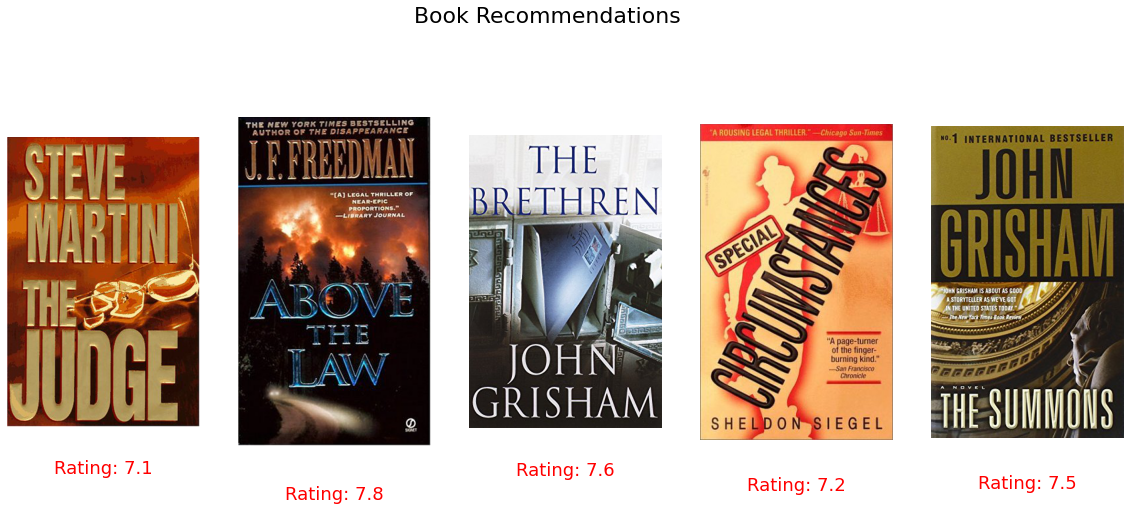

In [ ]:
item_based_reco('A Painted House')

,Book Recommendations,Similarity Score
0,"Tuesdays with Morrie: An Old Man, a Young Man,...",0.849271
1,On a Night Like This,0.863930
2,Together Alone,0.878032
3,The Snow Bride,0.885956
4,"Nighttime Is My Time (Clark, Mary Higgins)",0.892233


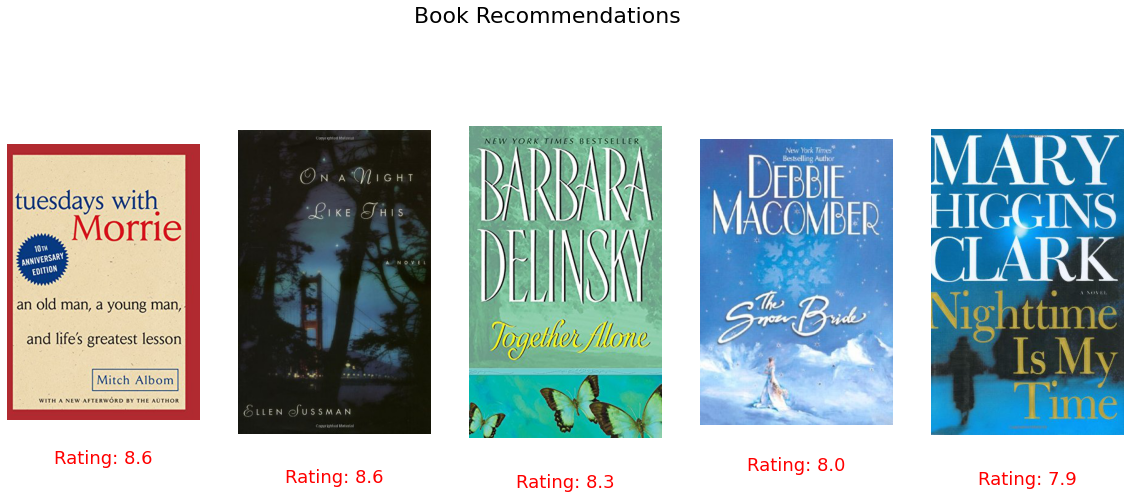

In [ ]:
item_based_reco('The Five People You Meet in Heaven')